In [127]:
# from https://aetperf.github.io/2018/09/19/Nighttime-Lights-with-Rasterio-and-Datashader.html
# NOAA files are at https://ngdc.noaa.gov/eog/dmsp/download_radcal.html
import rasterio
from rasterio.mask import mask
import os
import datashader as ds
from datashader import transfer_functions as tf
import xarray as xr
from colorcet import palette
from shapely.geometry import box
import geopandas as gpd
from fiona.crs import from_epsg
import json

In [128]:
data_path = './F16_20100111-20110731_rad_v4.geotiff'
file_name = 'F16_20100111-20110731_rad_v4.avg_vis.tif'  # data from 2010
file_path = os.path.join(data_path, file_name)
data = rasterio.open(file_path)

In [129]:
type(raster)

rasterio.io.DatasetReader

In [130]:
data.crs


CRS({'init': u'epsg:4326'})

In [131]:
data.bounds


BoundingBox(left=-180.00416666665, bottom=-65.00416610665, right=180.00416522665, top=75.00416666665)

In [132]:
minx, miny = 60, 5.
maxx, maxy =  100, 45.
bbox = box(minx, miny, maxx, maxy)

geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))
coords = [json.loads(geo.to_json())['features'][0]['geometry']]
out_img, out_transform = mask(dataset=data, shapes=coords, crop=True)

In [133]:
da = xr.DataArray(out_img)[0][::-1]


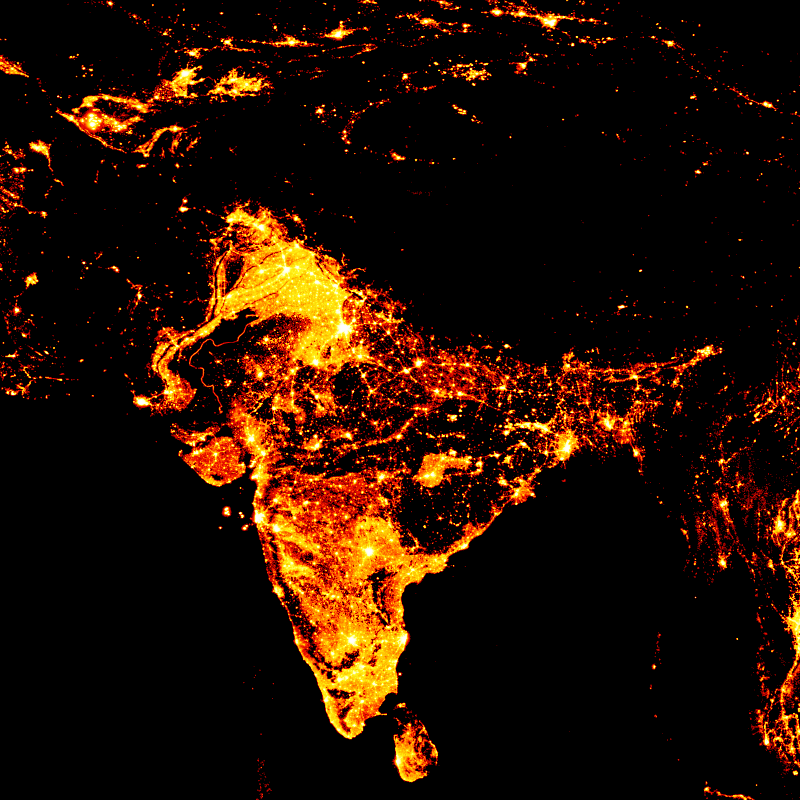

In [134]:
# colors
cmap = palette['fire']
bg_col = 'black'

cvs = ds.Canvas(plot_width=800, plot_height=800)
img = tf.shade(cvs.raster(da), cmap=cmap)
img = tf.set_background(img, bg_col)
img